In [19]:
import matplotlib.pyplot as plt
import numpy as np

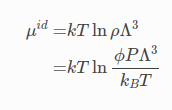

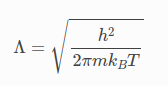

In [20]:
T = 300 # K
kB = 1.38e-23 # J/K
Na = 6.022e23 # mol-1
h = 6.626e-34 # Js
J_to_kcal = 0.000239
m_g_mol = 18 # g/mol
m_kg = m_g_mol / Na / 1000 # kg
lbd = np.sqrt(h**2/(2*np.pi*m_kg*kB*T))

# GOMC data

In [21]:
rho_vs_mu_GOMC = []
for mu_K in [3000, 3400, 3800, 4200, 4600, 5000, 5400, 5800, 6200]:
    mu_kcal_mol = mu_K*0.00198 # kcal/mol
    mu_J = mu_kcal_mol*4.184*1000/Na # J
    rho_O = np.loadtxt("outputs_mu"+str(mu_K)+"/density_O.dat")
    rho_H = np.loadtxt("outputs_mu"+str(mu_K)+"/density_H.dat")
    rho_H2O = rho_O+rho_H # g/cm3
    end_rho_H2O = np.mean(rho_H2O[:,1][-10:])
    rho_vs_mu_GOMC.append([mu_kcal_mol, end_rho_H2O, mu_J, mu_K])
rho_vs_mu_GOMC = np.array(rho_vs_mu_GOMC)

rho_ideal_GOMC = np.exp(-rho_vs_mu_GOMC[:,2]/(kB*T)) / lbd**3 # molecules per m3
rho_ideal_GOMC *= 18/Na # g/m3
rho_ideal_GOMC /= 100**3 # g/cm3

# LAMMPS data

In [22]:
rho_vs_mu_LAMMPS = []
for mu_K in [3400, 3600, 3800, 4000, 4200, 4400, 4600]:
    mu_kcal_mol = mu_K*0.00198 # kcal/mol
    mu_J = mu_kcal_mol*4.184*1000/Na # J
    rho_H2O = np.loadtxt("lammps-comparison/outputs_mu"+str(mu_K)+"/density_H2O.dat")
    end_rho_H2O = np.mean(rho_H2O[:,1][-10:])
    rho_vs_mu_LAMMPS.append([mu_kcal_mol, end_rho_H2O, mu_J, mu_K])
rho_vs_mu_LAMMPS = np.array(rho_vs_mu_LAMMPS)

rho_ideal_LAMMPS = np.exp(-rho_vs_mu_LAMMPS[:,2]/(kB*T)) / lbd**3 # molecules per m3
rho_ideal_LAMMPS *= 18/Na # g/m3
rho_ideal_LAMMPS /= 100**3 # g/cm3

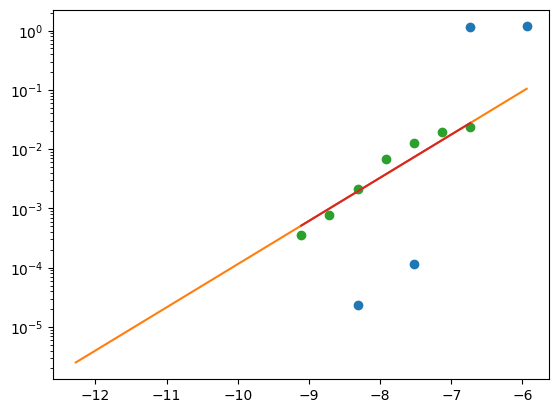

In [23]:
plt.semilogy(-rho_vs_mu_GOMC[:,0], rho_vs_mu_GOMC[:,1], 'o')
plt.semilogy(-rho_vs_mu_GOMC[:,0], rho_ideal_GOMC, '-')

plt.semilogy(-rho_vs_mu_LAMMPS[:,0], rho_vs_mu_LAMMPS[:,1], 'o')
plt.semilogy(-rho_vs_mu_LAMMPS[:,0], rho_ideal_LAMMPS, '-')